<a href="https://colab.research.google.com/github/yoonputer/Team_Project2/blob/master/Deeplearning/test_dummy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 설치

konlpy

mecab

In [1]:
! ls ./drive/MyDrive/Forkspoon/dummy1.xlsx

./drive/MyDrive/Forkspoon/dummy1.xlsx


In [2]:
!python -m pip install konlpy

     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 448 kB 27.9 MB/s 
     |████████████████████████████████| 86 kB 5.0 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


In [3]:
!curl -O https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5064  100  5064    0     0  99294      0 --:--:-- --:--:-- --:--:-- 99294


In [4]:
!source ./mecab.sh

Installing automake (A dependency for mecab-ko)
Get:1 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Get:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release [697 B]
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:8 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:9 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release.gpg [836 B]
Get:10 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ Packages [66.2 kB]
Get:11 http://archive.ubuntu.com/ubuntu bionic-updates InRelease

## 데이터 가져오기

In [5]:
!ls ./drive/MyDrive/Forkspoon/db.sqlite3

./drive/MyDrive/Forkspoon/db.sqlite3


In [6]:
import sqlite3
import pandas as pd
connect = sqlite3.connect('./drive/MyDrive/Forkspoon/db.sqlite3')

In [7]:
choice = pd.read_sql_query('select * from write_choice',connect)

In [8]:
type(choice)
choice_cols = choice[['점수','질문','답변']]
choice_cols

점수  ...                                                 답변
0     2.0  ...  \n경영은 전사의 콘텐츠 제작에서부터 유통 과정을 파악하고, 설정한 목표를 이루기 ...
1     3.0  ...  \n"‘재료’를 전공하며 나의 가치를 증명하다"\n 제조업은 우리나라 경제의 주요 ...
2     2.0  ...  \n"직접 만든다는 것"\n 실습을 위해 콤부차를 조사하였습니다. 한정된 자료에서 ...
3     2.0  ...  \n`전지적 참견 시점`\n 영업관리 직무는 BGF리테일의 점포 관리를 위한 매니저...
4     4.0  ...  \n16살에 처음 회계를 접하고 흥미를 느껴 뚜렷한 진로 방향을 형성했습니다.\n기...
...   ...  ...                                                ...
2992  2.0  ...  \n공작기계분야에 있어서 두산인프라코어, 현대위아와 어깨를 나란히 하는 화천기계는 ...
2993  4.0  ...  \n(`마트`라는 채널에서 보고 느낀 영업사원들의 모습)\n마트에서 일하면서 판매,...
2994  4.0  ...  \n<사람을 좋아하는 마음, 경험과 지식을 통해 또 다른 가치를 만들다> \n새로운...
2995  5.0  ...  \n‘2015 나노 코리아’에서 LG OLED UHD TV를 보고 말을 잃었습니다....
2996  3.0  ...  \n[공기와 같은 기업] \n한일 시멘트를 집약적으로 표현할 수 있는 말입니다. 고...

[2997 rows x 3 columns]

## NLP 

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_data = choice_cols['답변']
y_data = choice_cols['점수']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data)
x_train.shape, y_train.shape,x_test.shape, y_test.shape

((2247,), (2247,), (750,), (750,))

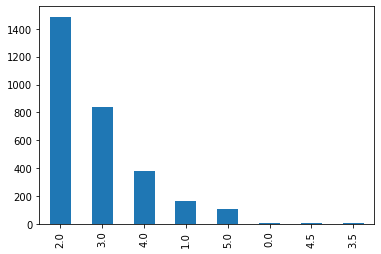

In [12]:
y_data.value_counts().plot(kind='bar')

In [13]:
type(x_train)

pandas.core.series.Series

In [14]:
x_temp = x_train
x_temp= x_temp.str.replace('[^가-힣ㄱ-ㅎ0-9ㅏ-ㅣ]','')
x_temp

2389    첫직장인근로복지공단에입사한후신입직원으로서열정을보이고싶었습니다좋은점1부서별조직도와업무...
2701    인턴경력에서나오는준비된인재저는해외경제연구및조사부문에서제능력을발휘할것으로생각합니다해외...
63      티웨이항공을선택한이유는앞으로더치열해질경쟁속에서티웨이항공과함께성장해나가는인재가되고싶기...
2275    에너지복지국민의행복는천연가스를국민에게안전하고안정적으로공급하기위해좋은에너지더좋은세상을...
1636    전공지식을위한노력화학공학에서배우는분리공정설계와공정제어과목을수강하며공정에대해익혔고열교...
                              ...                        
2086    생산설비관리제조설비의기능및가동율을분석하고생산공정이효율적으로운영될수있도록관리및개선도전...
126     기업의방향성을위해모든것을알아야하는직무경영기획직무에서중요한것은분석력과전사적관점입니다자...
2290    핸즈코퍼레이션의새로운성장엔진저는뛰어난기술력을통해세계적인기업으로성장하는핸즈코퍼레이션의...
1010    학부시절과대표를맡으며를기획할때적절한인재의기용을통해성공적인를만든경험이있습니다맨처음저는...
1267    금호건설급박하게바뀌는세계건설시장에빠르고새로운도전을통해건설업의새로운패러다임을제시하는금...
Name: 답변, Length: 2247, dtype: object

### stopwords

```
import pandas as pd

lst_A = ['a','b','c','d', 'e', 1, 2]
df = pd.DataFrame(lst_A)

df.columns=['']

import numpy as np

np.array(df[0].tolist())
```

In [15]:
stopwords = pd.read_sql_query('select * from stopwords',connect)

stopwords.describe()

type(stopwords)

pandas.core.frame.DataFrame

In [16]:
import numpy as np

ko_stopwords_list = np.array(stopwords['words'].tolist())
ko_stopwords_list

array(['이', '있', '하', ..., '잘', '통하', '놓'], dtype='<U4')

### Mecab

In [17]:
from konlpy.tag import Mecab
mecab= Mecab()

In [18]:
# mecab.pos(x_temp[0])
mecab.morphs(x_temp[0])

['경영',
 '은',
 '전사',
 '의',
 '콘텐츠',
 '제작',
 '에서부터',
 '유통',
 '과정',
 '을',
 '파악',
 '하',
 '고',
 '설정',
 '한',
 '목표',
 '를',
 '이루',
 '기',
 '위해',
 '전',
 '과정',
 '에서',
 '의',
 '문제점',
 '이나',
 '비',
 '효율',
 '성',
 '을',
 '제거',
 '하',
 '는',
 '직무',
 '임',
 '을',
 '알',
 '고',
 '있',
 '습니다',
 '이',
 '직무',
 '를',
 '수행',
 '하',
 '기',
 '위해서',
 '는',
 '상황',
 '판단력',
 '과',
 '문제',
 '해',
 '결력',
 '이',
 '필수',
 '역량',
 '이',
 '라고',
 '생각',
 '합니다',
 '아쉬운',
 '점',
 '1',
 '한국어',
 '영어',
 '일본어',
 '에',
 '이르',
 '는',
 '언어',
 '구사력',
 '과',
 '빠른',
 '적응력',
 '을',
 '바탕',
 '으로',
 '풍부',
 '한',
 '사회',
 '경험',
 '을',
 '하',
 '며',
 '핵심',
 '역량',
 '을',
 '키웠',
 '습니다',
 '와',
 '에서',
 '교육',
 '콘텐츠',
 '개발',
 '및',
 '학생',
 '응대',
 '업무',
 '를',
 '수행',
 '하',
 '면서',
 '클라이언트',
 '와',
 '의',
 '소통',
 '을',
 '통한',
 '효율',
 '적',
 '인',
 '문제',
 '해결',
 '방법',
 '을',
 '끊임없이',
 '모색',
 '하',
 '여',
 '최선',
 '의',
 '결과',
 '를',
 '도출',
 '하',
 '곤',
 '했',
 '습니다',
 '회사부',
 '대표',
 '님',
 '말씀',
 '에',
 '따르',
 '면',
 '제',
 '가',
 '제작',
 '에',
 '참여',
 '한',
 '교재',
 '콘텐츠',
 '나',
 '상담',
 '내역',
 '을',
 '기록',


In [19]:
sentance = list ()
 
for tok in x_temp:
  encoded = mecab.morphs(tok)

  sentance.append([item for item in encoded if item not in ko_stopwords_list])

sentance

[['직장',
  '근로복지공단',
  '입사',
  '신입',
  '직원',
  '으로서',
  '열정',
  '1',
  '부서',
  '별',
  '조직도',
  '업무',
  '매뉴얼',
  '모든',
  '낯설',
  '어려웠',
  '매일',
  '30',
  '분',
  '일찍',
  '출근',
  '업무',
  '준비',
  '마친',
  '후제',
  '속한',
  '부서',
  '동료',
  '상사',
  '이름',
  '맡',
  '업무',
  '외웠',
  '업무',
  '업무',
  '매뉴얼',
  '참고',
  '였으며',
  '궁금',
  '간략',
  '정리',
  '동료',
  '상사',
  '다가가',
  '도움',
  '요청',
  '2',
  '낯선',
  '조직',
  '구성원',
  '인정',
  '조직',
  '빨리',
  '적응',
  '구성원',
  '이름',
  '성격',
  '업무',
  '맡',
  '는지',
  '대한',
  '기본',
  '정보',
  '바탕',
  '세심',
  '관심',
  '열정',
  '표현',
  '업무',
  '지속',
  '반복',
  '통해',
  '숙련도',
  '높이',
  '중요',
  '다고',
  '합니다',
  '적극',
  '자세',
  '업무',
  '빠르',
  '배울',
  '기회',
  '통해',
  '업무',
  '능력',
  '향상',
  '도움',
  '으며',
  '조직',
  '빨리',
  '적응',
  '섬세',
  '열정',
  '내부',
  '직원',
  '고객',
  '열린',
  '마음',
  '소통',
  '직원',
  '입니다',
  '아쉬운',
  '1',
  '글자',
  '497',
  '862'],
 ['인턴',
  '경력',
  '준비',
  '인재',
  '해외',
  '경제',
  '연구',
  '조사',
  '부문',
  '능력',
  '발휘',
  '합니다',
  '해외',
  '경제',
  '연구',
  '조사',
  

## Tokenizer

In [20]:
import tensorflow as tf

In [21]:
tokenizer = tf.keras.preprocessing.text.Tokenizer()

In [22]:
tokenizer.fit_on_texts(sentance)

In [23]:
tokenizer.word_index

{'1': 1,
 '아쉬운': 2,
 '며': 3,
 '통해': 4,
 '고객': 5,
 '입니다': 6,
 '글자': 7,
 '합니다': 8,
 '경험': 9,
 '업무': 10,
 '2': 11,
 '위해': 12,
 '성': 13,
 '대한': 14,
 '기업': 15,
 '관리': 16,
 '직무': 17,
 '지원': 18,
 '역량': 19,
 '성장': 20,
 '분석': 21,
 '회사': 22,
 '다양': 23,
 '지식': 24,
 '영업': 25,
 '능력': 26,
 '산업': 27,
 '사업': 28,
 '개발': 29,
 '노력': 30,
 '제품': 31,
 '기술': 32,
 '라는': 33,
 '던': 34,
 '시장': 35,
 '화': 36,
 '중요': 37,
 '필요': 38,
 '3': 39,
 '수행': 40,
 '다고': 41,
 '전공': 42,
 '다는': 43,
 '분야': 44,
 '생산': 45,
 '라고': 46,
 '바탕': 47,
 '서비스': 48,
 '데이터': 49,
 '발전': 50,
 '가장': 51,
 '진행': 52,
 '과정': 53,
 '공정': 54,
 '목표': 55,
 '활동': 56,
 '위한': 57,
 '관심': 58,
 '입사': 59,
 '활용': 60,
 '이해': 61,
 '가치': 62,
 '프로젝트': 63,
 '도전': 64,
 '설계': 65,
 '공부': 66,
 '환경': 67,
 '소통': 68,
 '전문': 69,
 '파악': 70,
 '인턴': 71,
 '상품': 72,
 '시스템': 73,
 '기획': 74,
 '현장': 75,
 '제공': 76,
 '전기': 77,
 '세계': 78,
 '금융': 79,
 '정보': 80,
 '고자': 81,
 '새로운': 82,
 '큰': 83,
 '기여': 84,
 '님': 85,
 '사용': 86,
 '미래': 87,
 '직접': 88,
 '한국': 89,
 '운영': 90,
 '전문가': 91,
 '팀': 9

In [24]:
tokenizer.word_counts

OrderedDict([('직장', 124),
             ('근로복지공단', 2),
             ('입사', 727),
             ('신입', 148),
             ('직원', 342),
             ('으로서', 284),
             ('열정', 290),
             ('1', 3715),
             ('부서', 299),
             ('별', 199),
             ('조직도', 1),
             ('업무', 2115),
             ('매뉴얼', 33),
             ('모든', 274),
             ('낯설', 3),
             ('어려웠', 20),
             ('매일', 102),
             ('30', 57),
             ('분', 200),
             ('일찍', 12),
             ('출근', 23),
             ('준비', 404),
             ('마친', 13),
             ('후제', 11),
             ('속한', 25),
             ('동료', 154),
             ('상사', 39),
             ('이름', 29),
             ('맡', 352),
             ('외웠', 1),
             ('참고', 15),
             ('였으며', 83),
             ('궁금', 26),
             ('간략', 4),
             ('정리', 111),
             ('다가가', 79),
             ('도움', 383),
             ('요청', 49),
             ('2', 2088),
   

In [25]:
total_cnt = len(tokenizer.word_index)

In [26]:
rare_cnt = 0
total_freq,rare_freq = 0,0

for key, value in tokenizer.word_counts.items():
  total_freq = total_freq + value #전체 단어의 수
  if(value <=2):
    rare_cnt = rare_cnt+ 1  
    rare_freq = rare_freq + value #2미만인 단어(희귀단어)의 수

In [27]:
total_cnt, rare_cnt, (rare_cnt/total_cnt)*100, (rare_freq/total_freq)*100

(16423, 8664, 52.755282226146264, 3.600153198008426)

In [28]:
vocab_size = total_cnt - rare_cnt #보케블러리 사이즈
vocab_size 

7759

In [29]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(vocab_size, oov_token='OOV')

In [30]:
tokenizer.fit_on_texts(sentance)

In [31]:
tokenizer.index_word

{1: 'OOV',
 2: '1',
 3: '아쉬운',
 4: '며',
 5: '통해',
 6: '고객',
 7: '입니다',
 8: '글자',
 9: '합니다',
 10: '경험',
 11: '업무',
 12: '2',
 13: '위해',
 14: '성',
 15: '대한',
 16: '기업',
 17: '관리',
 18: '직무',
 19: '지원',
 20: '역량',
 21: '성장',
 22: '분석',
 23: '회사',
 24: '다양',
 25: '지식',
 26: '영업',
 27: '능력',
 28: '산업',
 29: '사업',
 30: '개발',
 31: '노력',
 32: '제품',
 33: '기술',
 34: '라는',
 35: '던',
 36: '시장',
 37: '화',
 38: '중요',
 39: '필요',
 40: '3',
 41: '수행',
 42: '다고',
 43: '전공',
 44: '다는',
 45: '분야',
 46: '생산',
 47: '라고',
 48: '바탕',
 49: '서비스',
 50: '데이터',
 51: '발전',
 52: '가장',
 53: '진행',
 54: '과정',
 55: '공정',
 56: '목표',
 57: '활동',
 58: '위한',
 59: '관심',
 60: '입사',
 61: '활용',
 62: '이해',
 63: '가치',
 64: '프로젝트',
 65: '도전',
 66: '설계',
 67: '공부',
 68: '환경',
 69: '소통',
 70: '전문',
 71: '파악',
 72: '인턴',
 73: '상품',
 74: '시스템',
 75: '기획',
 76: '현장',
 77: '제공',
 78: '전기',
 79: '세계',
 80: '금융',
 81: '정보',
 82: '고자',
 83: '새로운',
 84: '큰',
 85: '기여',
 86: '님',
 87: '사용',
 88: '미래',
 89: '직접',
 90: '한국',
 91: '운영',
 92: '전

## To int 


In [32]:
x_train = tokenizer.texts_to_sequences(sentance)

In [33]:
len(x_train[0]),len(x_train[40]),len(x_train[50])

(107, 180, 138)

In [34]:
hist_len = [len(words) for words in x_train]

In [35]:
import matplotlib.pyplot as plt

(array([  7.,   2.,  11.,  28.,  62.,  71., 120., 183., 260., 254., 194.,
        198., 163., 126.,  85.,  99.,  96.,  91.,  72.,  48.,   8.,   8.,
          9.,  10.,   3.,   8.,   2.,   3.,   3.,   5.,   3.,   2.,   2.,
          5.,   2.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([  5.  ,  16.48,  27.96,  39.44,  50.92,  62.4 ,  73.88,  85.36,
         96.84, 108.32, 119.8 , 131.28, 142.76, 154.24, 165.72, 177.2 ,
        188.68, 200.16, 211.64, 223.12, 234.6 , 246.08, 257.56, 269.04,
        280.52, 292.  , 303.48, 314.96, 326.44, 337.92, 349.4 , 360.88,
        372.36, 383.84, 395.32, 406.8 , 418.28, 429.76, 441.24, 452.72,
        464.2 , 475.68, 487.16, 498.64, 510.12, 521.6 , 533.08, 544.56,
        556.04, 567.52, 579.  ]),
 <a list of 50 Patch objects>)

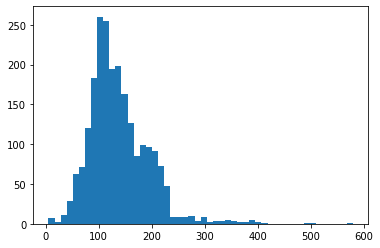

In [36]:
plt.hist(hist_len, bins=50)

- Pad 몇정도 하면 좋을지 여기서 확인

In [37]:
sum(hist_len)/ len(x_train)

137.1152647975078

In [38]:
x_train =tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=300)

In [39]:
x_train

array([[   0,    0,    0, ...,    8, 2447, 3256],
       [   0,    0,    0, ...,    8, 4670, 5351],
       [   0,    0,    0, ...,    8,    1,    1],
       ...,
       [   0,    0,    0, ...,    8, 5445,    1],
       [   0,    0,    0, ...,    8, 4190,    1],
       [   0,    0,    0, ...,    8, 5249, 3296]], dtype=int32)

In [40]:
len(y_train)

2247

In [41]:
np.unique(y_train)

array([0. , 1. , 2. , 3. , 3.5, 4. , 4.5, 5. ])

In [42]:
type(y_train)

pandas.core.series.Series

In [43]:
len(x_train), len(y_train)

(2247, 2247)

## Model

In [44]:
model = tf.keras.models.Sequential()

In [45]:
model.add(tf.keras.layers.Embedding(input_dim= vocab_size, output_dim =30 ,input_length=300))
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128)))
model.add(tf.keras.layers.Dense(8,activation='softmax'))

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['acc'])

In [46]:
hist = model.fit(x_train, y_train, epochs=100, batch_size=256, validation_split=0.3, shuffle=True)

Epoch 1/100
7/7 [==============================] - 24s 3s/step - loss: 2.0236 - acc: 0.4427 - val_loss: 1.8207 - val_acc: 0.4815
Epoch 2/100
7/7 [==============================] - 19s 3s/step - loss: 1.5770 - acc: 0.4975 - val_loss: 1.3368 - val_acc: 0.4815
Epoch 3/100
7/7 [==============================] - 19s 3s/step - loss: 1.3401 - acc: 0.4975 - val_loss: 1.3004 - val_acc: 0.4815
Epoch 4/100
7/7 [==============================] - 19s 3s/step - loss: 1.2819 - acc: 0.4975 - val_loss: 1.2872 - val_acc: 0.4815
Epoch 5/100
7/7 [==============================] - 19s 3s/step - loss: 1.2737 - acc: 0.4975 - val_loss: 1.2646 - val_acc: 0.4815
Epoch 6/100
7/7 [==============================] - 19s 3s/step - loss: 1.2600 - acc: 0.4975 - val_loss: 1.2727 - val_acc: 0.4815
Epoch 7/100
7/7 [==============================] - 19s 3s/step - loss: 1.2617 - acc: 0.4975 - val_loss: 1.2687 - val_acc: 0.4815
Epoch 8/100
7/7 [==============================] - 19s 3s/step - loss: 1.2499 - acc: 0.4975 - val

## Evaluation


In [48]:
model.evaluate(x_train, y_train) #loss: 0.0070 - acc: 0.9949 - val_loss: 3.3534 - val_acc: 0.4533

71/71 [==============================] - 8s 113ms/step - loss: 1.0121 - acc: 0.8322


[1.0120925903320312, 0.832220733165741]

## Service

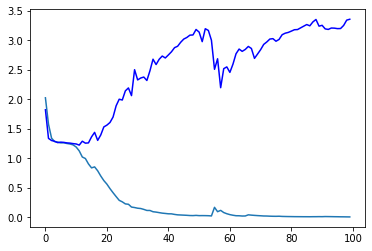

In [50]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'],'b-')
plt.show()

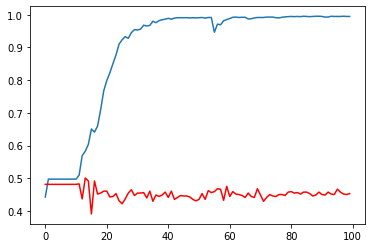

In [51]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'],'r-')
plt.show()